In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
# pio.renderers.default = 'browser'
from urllib.request import urlopen
import json
from copy import deepcopy
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### Creating one dataframe for all stores

In [2]:
# Combine csv files into one dataframe

# List of CSV file paths
csv_files = ["../data/processed/aldi_data.csv", "../data/processed/coop_data.csv", "../data/processed/lidl_data.csv", "../data/processed/migros_data.csv"]

# Create an empty DataFrame to store the combined data
stores_df = pd.DataFrame()

# Iterate through each CSV file and concatenate the data
for csv_file in csv_files:
    df = pd.read_csv(csv_file)
    
    # Add a new column with the original DataFrame name
    df["name"] = csv_file
    
    stores_df = pd.concat([stores_df, df], ignore_index=True)

# Display the combined DataFrame
stores_df

address   latitude  longitude kreis_name  \
0       Stadelhoferstrasse 10, 8001  47.366789   8.548001    Kreis 1   
1              Mythenquai 353, 8038  47.345470   8.534889    Kreis 2   
2             Albisstrasse 81, 8038  47.340868   8.530663    Kreis 2   
3        Witikonerstrasse 279, 8053  47.358731   8.585599    Kreis 7   
4               Sihlstrasse 3, 8001  47.373727   8.537653    Kreis 1   
..                              ...        ...        ...        ...   
109        Hardturmstrasse 11, 8005  47.391344   8.518489    Kreis 5   
110          Tessinerplatz 10, 8002  47.364369   8.530935    Kreis 2   
111  Birmensdorferstrasse 320, 8055  47.369893   8.508304    Kreis 3   
112         Scheffelstrasse 3, 8037  47.393773   8.529234   Kreis 10   
113    Schaffhauserstrasse 75, 8057  47.392614   8.538494    Kreis 6   

                                  name  
0      ../data/processed/aldi_data.csv  
1      ../data/processed/aldi_data.csv  
2      ../data/processed/aldi_data.csv  
3      ../data/processed/aldi_data.csv  
4      ../data/processed/aldi_data.csv  
..                                 ...  
109  ../data/processed/migros_data.csv  
110  ../data/processed/migros_data.csv  
111  ../data/processed/migros_data.csv  
112  ../data/processed/migros_data.csv  
113  ../data/processed/migros_data.csv  

[114 rows x 5 columns]

In [3]:
# Function to extract store names from file paths
import os
def extract_store_name(file_path):
    base_name = os.path.basename(file_path)
    store_name = os.path.splitext(base_name)[0].split('_')[0]
    return store_name

# Apply the function to create a new column "store"
stores_df["store"] = stores_df["name"].apply(extract_store_name)
stores_df

address   latitude  longitude kreis_name  \
0       Stadelhoferstrasse 10, 8001  47.366789   8.548001    Kreis 1   
1              Mythenquai 353, 8038  47.345470   8.534889    Kreis 2   
2             Albisstrasse 81, 8038  47.340868   8.530663    Kreis 2   
3        Witikonerstrasse 279, 8053  47.358731   8.585599    Kreis 7   
4               Sihlstrasse 3, 8001  47.373727   8.537653    Kreis 1   
..                              ...        ...        ...        ...   
109        Hardturmstrasse 11, 8005  47.391344   8.518489    Kreis 5   
110          Tessinerplatz 10, 8002  47.364369   8.530935    Kreis 2   
111  Birmensdorferstrasse 320, 8055  47.369893   8.508304    Kreis 3   
112         Scheffelstrasse 3, 8037  47.393773   8.529234   Kreis 10   
113    Schaffhauserstrasse 75, 8057  47.392614   8.538494    Kreis 6   

                                  name   store  
0      ../data/processed/aldi_data.csv    aldi  
1      ../data/processed/aldi_data.csv    aldi  
2      ../data/processed/aldi_data.csv    aldi  
3      ../data/processed/aldi_data.csv    aldi  
4      ../data/processed/aldi_data.csv    aldi  
..                                 ...     ...  
109  ../data/processed/migros_data.csv  migros  
110  ../data/processed/migros_data.csv  migros  
111  ../data/processed/migros_data.csv  migros  
112  ../data/processed/migros_data.csv  migros  
113  ../data/processed/migros_data.csv  migros  

[114 rows x 6 columns]

In [4]:
# Sorting columns
column_order = ["store"] + [col for col in stores_df.columns if col != "store"]
stores_df = stores_df[column_order]

In [5]:
# Drop the "name" column
stores_df = stores_df.drop("name", axis=1)

In [6]:
# Cleaning kreis_name column - turning string to int
stores_df["Kreis"] = stores_df["kreis_name"].str.extract(r'Kreis (\d+)')
stores_df = stores_df.drop("kreis_name", axis=1)
stores_df["Kreis"] = stores_df["Kreis"].astype(int)
stores_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   store      114 non-null    object 
 1   address    114 non-null    object 
 2   latitude   114 non-null    float64
 3   longitude  114 non-null    float64
 4   Kreis      114 non-null    int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 4.6+ KB


In [7]:
# Adding Kreis info

df_kreis = pd.read_csv("../data/processed/Kreis_info.csv")
all_stores_df = pd.merge(stores_df, df_kreis, on="Kreis", how="inner")
all_stores_df

store                         address   latitude  longitude  Kreis  \
0      aldi     Stadelhoferstrasse 10, 8001  47.366789   8.548001      1   
1      aldi             Sihlstrasse 3, 8001  47.373727   8.537653      1   
2      coop           Bahnhofbrücke 1, 8001  47.376458   8.542357      1   
3      coop        Halle Löwenstrasse, 8021  47.378042   8.539067      1   
4      coop     Stadelhoferstrasse 10, 8001  47.366789   8.548001      1   
..      ...                             ...        ...        ...    ...   
109    coop        Seefeldstrasse 123, 8008  47.358377   8.555105      8   
110    coop         Seefeldstrasse 35, 8008  47.363175   8.549919      8   
111    coop            Forchstrasse 4, 8008  47.364443   8.554834      8   
112  migros  Seefeldstrasse 111 - 113, 8008  47.358365   8.554159      8   
113  migros          Forchstrasse 260, 8008  47.357709   8.571073      8   

     Kreis Area (km^2)  Kreis Population  Kreis Density (population/km^2)  
0                 1.80              5817                             3232  
1                 1.80              5817                             3232  
2                 1.80              5817                             3232  
3                 1.80              5817                             3232  
4                 1.80              5817                             3232  
..                 ...               ...                              ...  
109               4.81             17818                             3704  
110               4.81             17818                             3704  
111               4.81             17818                             3704  
112               4.81             17818                             3704  
113               4.81             17818                             3704  

[114 rows x 8 columns]

In [28]:
# Adding median income data
df_income = pd.read_csv("../data/processed/average_income_per_kreis_sorted.csv")
df_all = pd.merge(all_stores_df, df_income, on="Kreis", how="inner")
df_all

store                         address   latitude  longitude  Kreis  \
0      aldi     Stadelhoferstrasse 10, 8001  47.366789   8.548001      1   
1      aldi             Sihlstrasse 3, 8001  47.373727   8.537653      1   
2      coop           Bahnhofbrücke 1, 8001  47.376458   8.542357      1   
3      coop        Halle Löwenstrasse, 8021  47.378042   8.539067      1   
4      coop     Stadelhoferstrasse 10, 8001  47.366789   8.548001      1   
..      ...                             ...        ...        ...    ...   
109    coop        Seefeldstrasse 123, 8008  47.358377   8.555105      8   
110    coop         Seefeldstrasse 35, 8008  47.363175   8.549919      8   
111    coop            Forchstrasse 4, 8008  47.364443   8.554834      8   
112  migros  Seefeldstrasse 111 - 113, 8008  47.358365   8.554159      8   
113  migros          Forchstrasse 260, 8008  47.357709   8.571073      8   

     Kreis Area (km^2)  Kreis Population  Kreis Density (population/km^2)  \
0                 1.80              5817                             3232   
1                 1.80              5817                             3232   
2                 1.80              5817                             3232   
3                 1.80              5817                             3232   
4                 1.80              5817                             3232   
..                 ...               ...                              ...   
109               4.81             17818                             3704   
110               4.81             17818                             3704   
111               4.81             17818                             3704   
112               4.81             17818                             3704   
113               4.81             17818                             3704   

     Median value of taxable income  
0                             76.38  
1                             76.38  
2                             76.38  
3                             76.38  
4                             76.38  
..                              ...  
109                           88.97  
110                           88.97  
111                           88.97  
112                           88.97  
113                           88.97  

[114 rows x 9 columns]

In [29]:
# Save DataFrame to CSV
all_stores_df.to_csv("../data/processed/all_stores_data.csv", index=False)
df_all.to_csv("../data/processed/all_data.csv", index=False)

### Plotting data

In [30]:
# Copy the dataset
df_stores = deepcopy(all_stores_df)
df_all_data = deepcopy(df_all)

In [31]:
with open("../data/raw/stzh.adm_stadtkreise_a.json") as response:
    kreise = json.load(response)

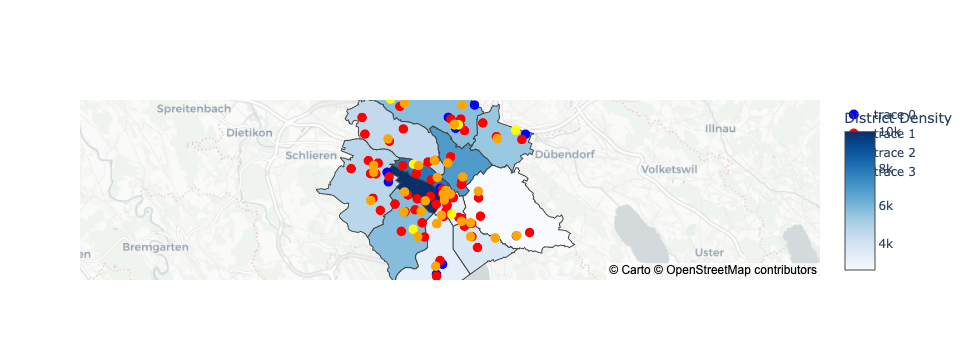

In [18]:
# Get unique store names and assign a color to each
unique_stores = df_stores['store'].unique()
store_colors = {
    'aldi': 'blue',
    'coop': 'red',
    'lidl': 'yellow',
    'migros': 'orange'
}

# Create a choropleth map for district density
choropleth_map = go.Choroplethmapbox(
    geojson=kreise,
    locations=df_stores['Kreis'],
    featureidkey="properties.name",
    z=df_stores['Kreis Density (population/km^2)'],
    colorscale='Blues',  # Choose a colorscale
    colorbar=dict(title='District Density'),
    hovertemplate="<b>%{location}</b><br>" +
                  "District Density: %{z:.2f}<br>" +
                  "<extra></extra>",
)
# Create a scatter map for store locations
fig = go.Figure()

# Iterate over unique store names and add traces
for store in unique_stores:
    store_data = df_stores[df_stores['store'] == store]
    
    # Add a scatter trace for each store
    fig.add_trace(
        go.Scattermapbox(
            lat=store_data['latitude'],
            lon=store_data['longitude'],
            mode='markers',
            text="store",
            marker=dict(
                size=10,
                color=store_colors[store],
            )
            # text=store_data['store'],
            # hovertemplate="<b>%{text}</b><br><br>" +
            #               "<extra></extra>"
        )
    )



# Create a layout for the map
layout = go.Layout(
    mapbox=dict(
        center={"lat": 47.38, "lon": 8.54},
        style="carto-positron",
        zoom=10,
    )
)

# Create a Figure with both scatter and choropleth maps
# fig = go.Figure(data=[scatter_map, choropleth_map], layout=layout)

# Add the choropleth map to the Figure
fig.add_trace(choropleth_map)

# Update the layout
fig.update_layout(layout)

# Show the map
fig.show()

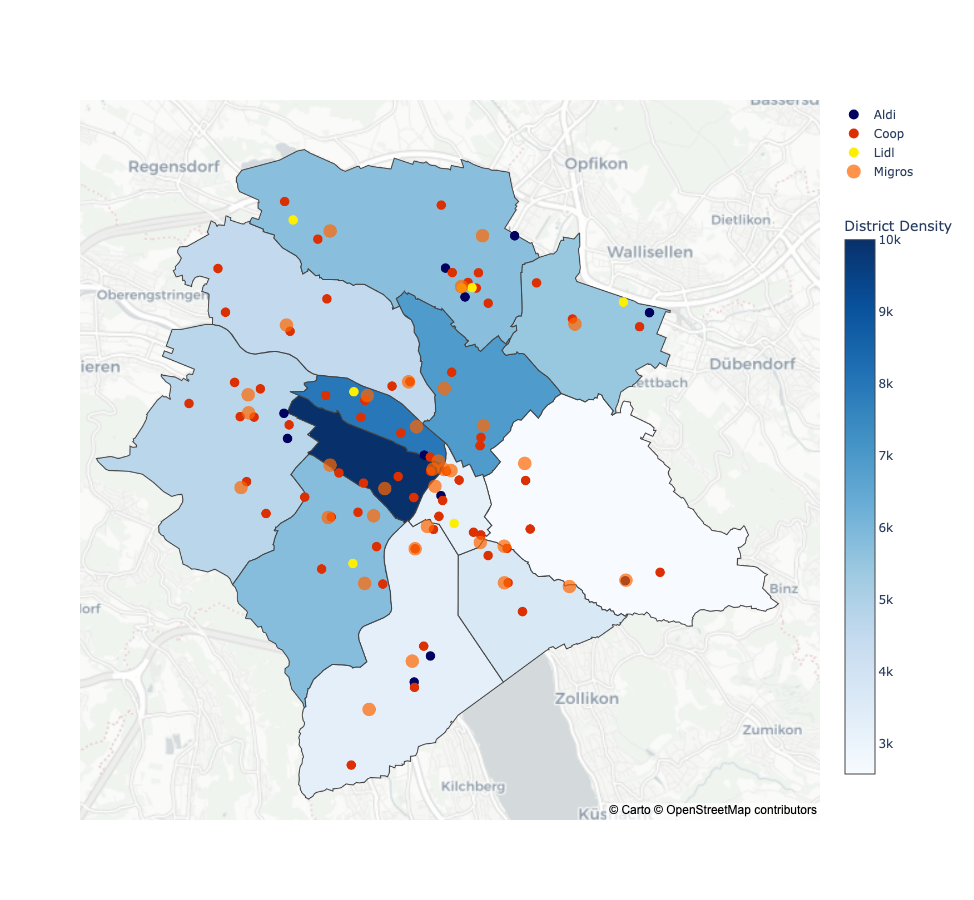

In [51]:
# Get unique store names and assign a color to each
unique_stores = df_stores['store'].unique()
store_colors = {
    'aldi': '#010160',
    'coop': '#DC3003',
    'lidl': '#FEEF02',
    'migros': '#FF6600'
}

# Create a scatter map for store locations
fig = go.Figure()

# Create a choropleth map for district density
fig.add_trace(
    go.Choroplethmapbox(
        geojson=kreise,
        locations=df_stores['Kreis'],
        featureidkey="properties.name",
        z=df_stores['Kreis Density (population/km^2)'],
        colorscale='Blues',  # Choose a colorscale
        colorbar=dict(
            title='District Density',
            y=0.45,   
            len=0.8,
        ),
        hovertemplate="<b>%{location}</b><br>" +
                        "District Density: %{z:.2f}<br>" +
                        "<extra></extra>"
    )
)


# Iterate over unique store names and add traces
for store in unique_stores:
    store_data = df_stores[df_stores['store'] == store]

    # Add a scatter trace for each store
    if store == 'migros':
        # Customize markers for 'migros'
        fig.add_trace(
            go.Scattermapbox(
                ids=store_data['store'],
                lat=store_data['latitude'],
                lon=store_data['longitude'],
                mode='markers',
                opacity=0.7,
                name=store.title(),
                text=store_data.apply(lambda x: f"{x['store'].title()}<br>{x['address']}<br>Kreis {x['Kreis']}", axis=1),
                marker=dict(
                    size=14,
                    color=store_colors[store],
                ),
                hovertemplate="<b>%{text}</b><br><extra></extra>"
            )
        )
    else:
        # Default scatter trace for other stores
        fig.add_trace(
            go.Scattermapbox(
                ids=store_data['store'],
                lat=store_data['latitude'],
                lon=store_data['longitude'],
                mode='markers',
                name=store.title(),
                text=store_data.apply(lambda x: f"{x['store'].title()}<br>{x['address']}<br>Kreis {x['Kreis']}", axis=1),
                marker=dict(
                    size=10,
                    color=store_colors[store],
                ),
                hovertemplate="<b>%{text}</b><br><extra></extra>"
            )
        )
        
# Create a layout for the map
layout = go.Layout(
    mapbox=dict(
        center={"lat": 47.38, "lon": 8.54},
        style="carto-positron",
        zoom=11.4,
    ),
    width=1000,
    height=900
)

# Update the layout
fig.update_layout(layout)

# Show the map
fig.show()

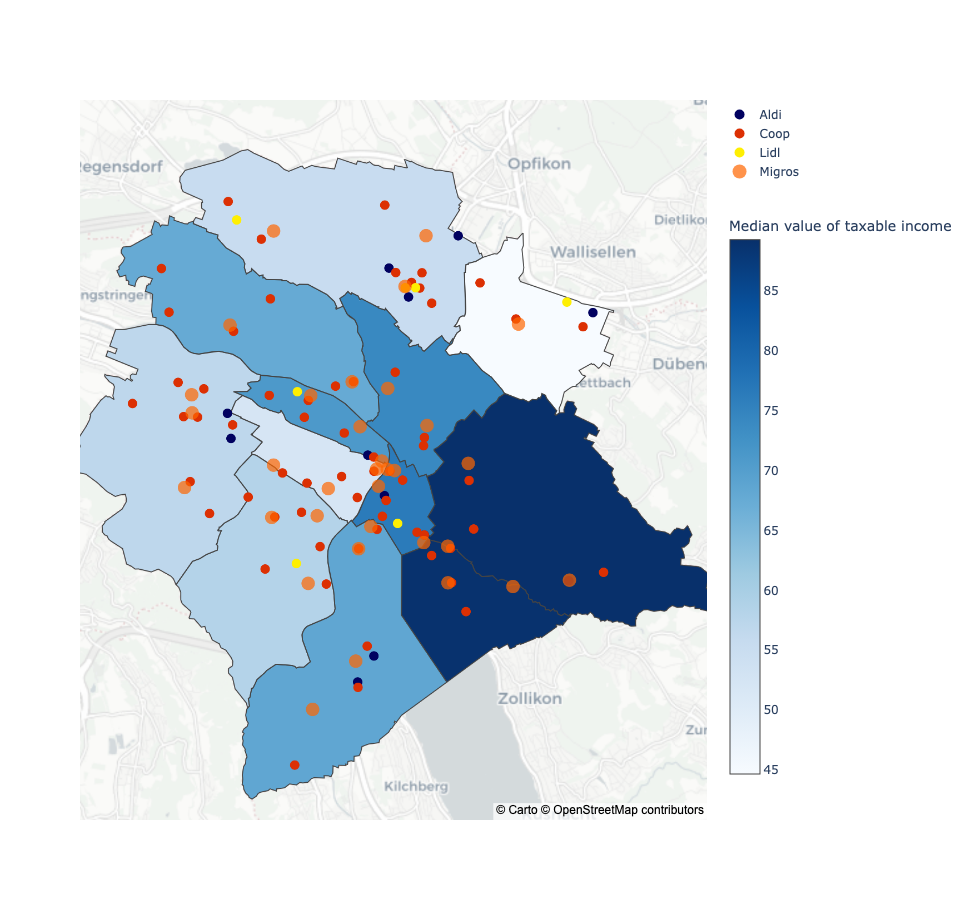

In [47]:
# Map with income data
# Get unique store names and assign a color to each
unique_stores = df_all_data['store'].unique()
store_colors = {
    'aldi': '#010160',
    'coop': '#DC3003',
    'lidl': '#FEEF02',
    'migros': '#FF6600'
}

# Create a scatter map for store locations
fig = go.Figure()

# Create a choropleth map for district density
fig.add_trace(
    go.Choroplethmapbox(
        geojson=kreise,
        locations=df_all_data['Kreis'],
        featureidkey="properties.name",
        z=df_all_data['Median value of taxable income'],
        colorscale='Blues',  # Choose a colorscale
        colorbar=dict(
            title='Median value of taxable income',
            y=0.45,   
            len=0.8,
        ),
        hovertemplate="<b>%{location}</b><br>" +
                        "Median value of taxable income: %{z:.2f}<br>" +
                        "<extra></extra>"
    )
)


# Iterate over unique store names and add traces
for store in unique_stores:
    store_data = df_all_data[df_all_data['store'] == store]

    # Add a scatter trace for each store
    if store == 'migros':
        # Customize markers for 'migros'
        fig.add_trace(
            go.Scattermapbox(
                ids=store_data['store'],
                lat=store_data['latitude'],
                lon=store_data['longitude'],
                mode='markers',
                opacity=0.7,
                name=store.title(),
                text=store_data.apply(lambda x: f"{x['store'].title()}<br>{x['address']}<br>Kreis {x['Kreis']}", axis=1),
                marker=dict(
                    size=14,
                    color=store_colors[store],
                ),
                hovertemplate="<b>%{text}</b><br><extra></extra>"
            )
        )
    else:
        # Default scatter trace for other stores
        fig.add_trace(
            go.Scattermapbox(
                ids=store_data['store'],
                lat=store_data['latitude'],
                lon=store_data['longitude'],
                mode='markers',
                name=store.title(),
                text=store_data.apply(lambda x: f"{x['store'].title()}<br>{x['address']}<br>Kreis {x['Kreis']}", axis=1),
                marker=dict(
                    size=10,
                    color=store_colors[store],
                ),
                hovertemplate="<b>%{text}</b><br><extra></extra>"
            )
        )
        
# Create a layout for the map
layout = go.Layout(
    mapbox=dict(
        center={"lat": 47.38, "lon": 8.54},
        style="carto-positron",
        zoom=11.4,
    ),
    width=1000,
    height=900
)

# Update the layout
fig.update_layout(layout)

# Show the map
fig.show()